In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt

In [2]:
import config

In [3]:

pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [4]:
results_folder = os.path.join(".", "distances-results")

In [5]:
results = []

for shell in config.SHELLS:
    for i in range(int(config.STEPS/config.INTERVAL)):
        p = results_folder
        p = os.path.join(p, f"{shell['name']}")
        p = os.path.join(p, f"{i}.csv")
        df = pd.read_csv(p)
        df["shell"] = shell["name"]
        df["t"] = i * config.INTERVAL
        results.append(df)

df = pd.concat(results)
df = df.reset_index(drop=True)

In [6]:
df.head()

,a,b,distance,height,active,shell,t
0,0,1,1977198,6857820,1,st1,0
1,1,2,1977239,6856036,1,st1,0
2,2,3,1977826,6854262,1,st1,0
3,3,4,1978239,6852293,1,st1,0
4,4,5,1978393,6850611,1,st1,0


In [7]:
# let's make a nicer graph
shells = {x["name"]: x for x in config.SHELLS}
df["Shell"] = df["shell"].apply(lambda x: f"{shells[x]['planes']}/{shells[x]['sats']}/{shells[x]['altitude']}km/{shells[x]['inc']}°")

df["Altitude"] = (df["height"])/1000 - max(config.EARTH_RADIUS_EQUATORIAL, config.EARTH_RADIUS_POLAR)


[Text(0.5, 0, 'Minimum ISL Altitude (km)')]

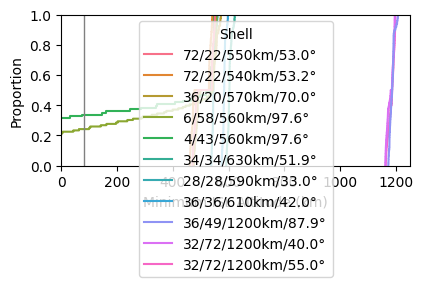

In [8]:
df_graph = df[df["t"] == 1]

g = sns.ecdfplot(data=df_graph, x="Altitude", hue="Shell")
# g.legend(loc='upper right', ncol=2)
# g.get_legend().set_title(None)
g.set(xlim=[0,1250])
g.axvline(x=80, color="grey", linestyle='-', linewidth=1)
g.set(xlabel="Minimum ISL Altitude (km)")
# g.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
# g.get_figure().savefig("../graphs/profile-full.pdf", bbox_inches="tight")

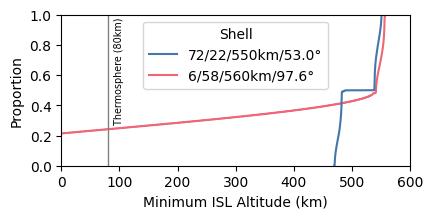

: 

In [10]:
# df_graph = df[df["t"] == 1]
df_graph = df[df["t"] < 3600]
df_graph = df_graph[(df_graph["shell"] == "st1") | (df_graph["shell"] == "st4")]

g = sns.ecdfplot(data=df_graph, x="Altitude", hue="Shell")
g.set(xlim=[0,600])
# g.get_legend().set_title("Shell (#Planes/#Sats/Alt/Inc)")
g.axvline(x=80, color="grey", linestyle='-', linewidth=1)
g.text(100, 0.63, "Thermosphere (80km)", horizontalalignment='center', verticalalignment='center', rotation='vertical', fontsize="x-small")
g.set(xlabel="Minimum ISL Altitude (km)")
# g.xaxis.set_major_formatter(matplotlib.ticker.EngFormatter())
g.get_figure().savefig("./isl_altitudes.pdf", bbox_inches="tight")